# Setting up the project

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
import seaborn as sns
import zipfile
import urllib.request

## Downloading the data

The data has been uploaded to my repository on GitHub for ease of access.

In [2]:
github_link = 'https://github.com/rogopac06/CS-Project-2022/raw/main/adoptions.zip'
local = 'adoptions.zip'

# using urllib.request to retrieve the zip file from the url
urllib.request.urlretrieve(github_link, local)

# unzipping the file into the current directory
with zipfile.ZipFile(local, 'r') as zip_ref:
    zip_ref.extractall('.')


The data is then read into a pandas dataframe.

In [3]:
dogs = pd.read_csv('dogs.csv')
travels = pd.read_csv('dogTravel.csv')
nst = pd.read_csv('NST-EST2021-POP.csv', header=None)

## Brief look at the data

in order to have a first glance at the data i'll perform a few basic exploratory data analysis (e.g. looking at the first few rows, the shape of the data, the data types, etc.)

### Dogs data

In [4]:
for df in [dogs, travels, nst]:
    print(df.shape)

(58180, 37)
(6194, 9)
(51, 2)


In [5]:
dogs.head()

,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,...,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description,stay_duration,stay_cost
0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,White / Cream,...,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...,70,124.81
1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,Brown / Chocolate,...,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...,49,122.07
2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,Brindle,...,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...,87,281.51
3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,NaN,...,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN,62,145.83
4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,NaN,...,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...,93,241.09


In [6]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58180 entries, 0 to 58179
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               58180 non-null  int64  
 1   org_id           58180 non-null  object 
 2   url              58180 non-null  object 
 3   type.x           58180 non-null  object 
 4   species          58180 non-null  object 
 5   breed_primary    58180 non-null  object 
 6   breed_secondary  20821 non-null  object 
 7   breed_mixed      58180 non-null  bool   
 8   breed_unknown    58180 non-null  bool   
 9   color_primary    26134 non-null  object 
 10  color_secondary  12059 non-null  object 
 11  color_tertiary   1217 non-null   object 
 12  age              58180 non-null  object 
 13  sex              58180 non-null  object 
 14  size             58180 non-null  object 
 15  coat             27185 non-null  object 
 16  fixed            58180 non-null  bool   
 17  house_traine

In [7]:
dogs.columns

Index(['id', 'org_id', 'url', 'type.x', 'species', 'breed_primary',
       'breed_secondary', 'breed_mixed', 'breed_unknown', 'color_primary',
       'color_secondary', 'color_tertiary', 'age', 'sex', 'size', 'coat',
       'fixed', 'house_trained', 'declawed', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'name', 'status', 'posted',
       'contact_city', 'contact_state', 'contact_zip', 'contact_country',
       'stateQ', 'accessed', 'type.y', 'description', 'stay_duration',
       'stay_cost'],
      dtype='object')

### Travels data

In [8]:
travels.head()

,index,id,contact_city,contact_state,description,found,manual,remove,still_there
0,0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN


The 'index' column is not needed so it will be dropped.

In [9]:
travels.drop('index', axis=1, inplace=True)

In [10]:
travels.head()

,id,contact_city,contact_state,description,found,manual,remove,still_there
0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN


In [11]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             6194 non-null   int64 
 1   contact_city   6194 non-null   object
 2   contact_state  6194 non-null   object
 3   description    6194 non-null   object
 4   found          6194 non-null   object
 5   manual         2147 non-null   object
 6   remove         1738 non-null   object
 7   still_there    319 non-null    object
dtypes: int64(1), object(7)
memory usage: 387.2+ KB


### nst data

In [12]:
nst.head()

,0,1
0,Alabama,5.024.279
1,Alaska,733.391
2,Arizona,7.151.502
3,Arkansas,3.011.524
4,California,39.538.223


columns 0 and 1 can be renamed to something more meaningful.

In [13]:
nst.columns = ["State", "Population"]
nst.columns

Index(['State', 'Population'], dtype='object')

In [14]:
nst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       51 non-null     object
 1   Population  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


let's now focus on the project requests.

# Requests

## 1. Extract all dogs with status that is not adoptable

First let's look at the different status values in the dogs dataset.<br>

In [15]:
print(dogs.status.nunique(), '\n',
      dogs.status.unique())

34 
 ['adoptable' '2018-04-05T05:18:31+0000' '2017-05-26T21:43:16+0000'
 '2019-09-01T15:12:06+0000' '2019-08-06T12:15:58+0000'
 '2019-07-18T14:20:58+0000' '2019-07-11T20:34:42+0000'
 '2019-07-11T14:16:38+0000' '2019-08-10T16:00:35+0000'
 '2019-05-14T21:09:27+0000' '2016-12-15T13:33:43+0000'
 '2015-09-07T12:57:27+0000' '2018-07-05T00:55:08+0000'
 '2017-10-07T23:48:20+0000' '2019-09-07T04:09:12+0000'
 '2019-09-13T19:39:28+0000' '2019-04-25T01:56:52+0000'
 '2018-04-18T13:45:46+0000' '2019-09-08T18:21:21+0000'
 '2019-07-25T19:53:21+0000' '2015-06-29T23:58:09+0000'
 '2015-02-07T13:06:43+0000' '2019-09-20T01:50:51+0000'
 '2019-02-18T12:02:48+0000' '2013-10-10T13:57:39+0000'
 '2017-06-16T18:44:33+0000' '2015-12-25T12:28:30+0000'
 '2019-09-13T06:08:17+0000' '2019-09-10T16:43:35+0000'
 '2019-09-09T17:05:17+0000' '2019-08-24T16:32:31+0000'
 '2019-07-31T16:21:07+0000' '2019-07-29T21:50:16+0000'
 '2019-07-15T16:57:05+0000']


we have 33 status values that are not 'adoptable'.<br><br>
we can extract these rows and save them in a new dataframe.

In [16]:
adopted = dogs[dogs.status != 'adoptable']

In [17]:
adopted[['id', 'breed_primary', 'status']].head()

,id,breed_primary,status
644,41330726,German Shepherd Dog,2018-04-05T05:18:31+0000
5549,38169117,Boxer,2017-05-26T21:43:16+0000
10888,45833989,Beagle,2019-09-01T15:12:06+0000
11983,45515547,Mixed Breed,2019-08-06T12:15:58+0000
12495,45294115,Basset Hound,2019-07-18T14:20:58+0000


it looks like that the status gets changed once the dog is adopted.<br><br>
We can convert the status column of this new dataset into a datetime object for readability purposes.

In [18]:
adopted['status'] = pd.to_datetime(adopted['status']).dt.date

/var/folders/d0/_t6rl7116p7g18j4_88fd4br0000gp/T/ipykernel_49648/4252268378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted['status'] = pd.to_datetime(adopted['status']).dt.date


In [19]:
adopted[['id', 'breed_primary', 'status']].head()

,id,breed_primary,status
644,41330726,German Shepherd Dog,2018-04-05
5549,38169117,Boxer,2017-05-26
10888,45833989,Beagle,2019-09-01
11983,45515547,Mixed Breed,2019-08-06
12495,45294115,Basset Hound,2019-07-18


## 2. For each (primary) breed, determine the number of dogs

This can be easily done counting the grouped 'id' values of the 'primary_breed' column.

In [20]:
primary_breed_numbers = dogs.groupby('breed_primary')['id'].count().reset_index()
primary_breed_numbers.columns = ['Primary Breed', 'Total Number']

In [21]:
primary_breed_numbers

,Primary Breed,Total Number
0,Affenpinscher,17
1,Afghan Hound,4
2,Airedale Terrier,19
3,Akbash,3
4,Akita,181
...,...,...
211,Wirehaired Pointing Griffon,1
212,Wirehaired Terrier,60
213,Xoloitzcuintli / Mexican Hairless,11
214,Yellow Labrador Retriever,158


we can visualize the 10 most common breeds using a bar chart.

In [22]:
top10breed = primary_breed_numbers.sort_values(ascending=False, by='Total Number').head(10)

findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.


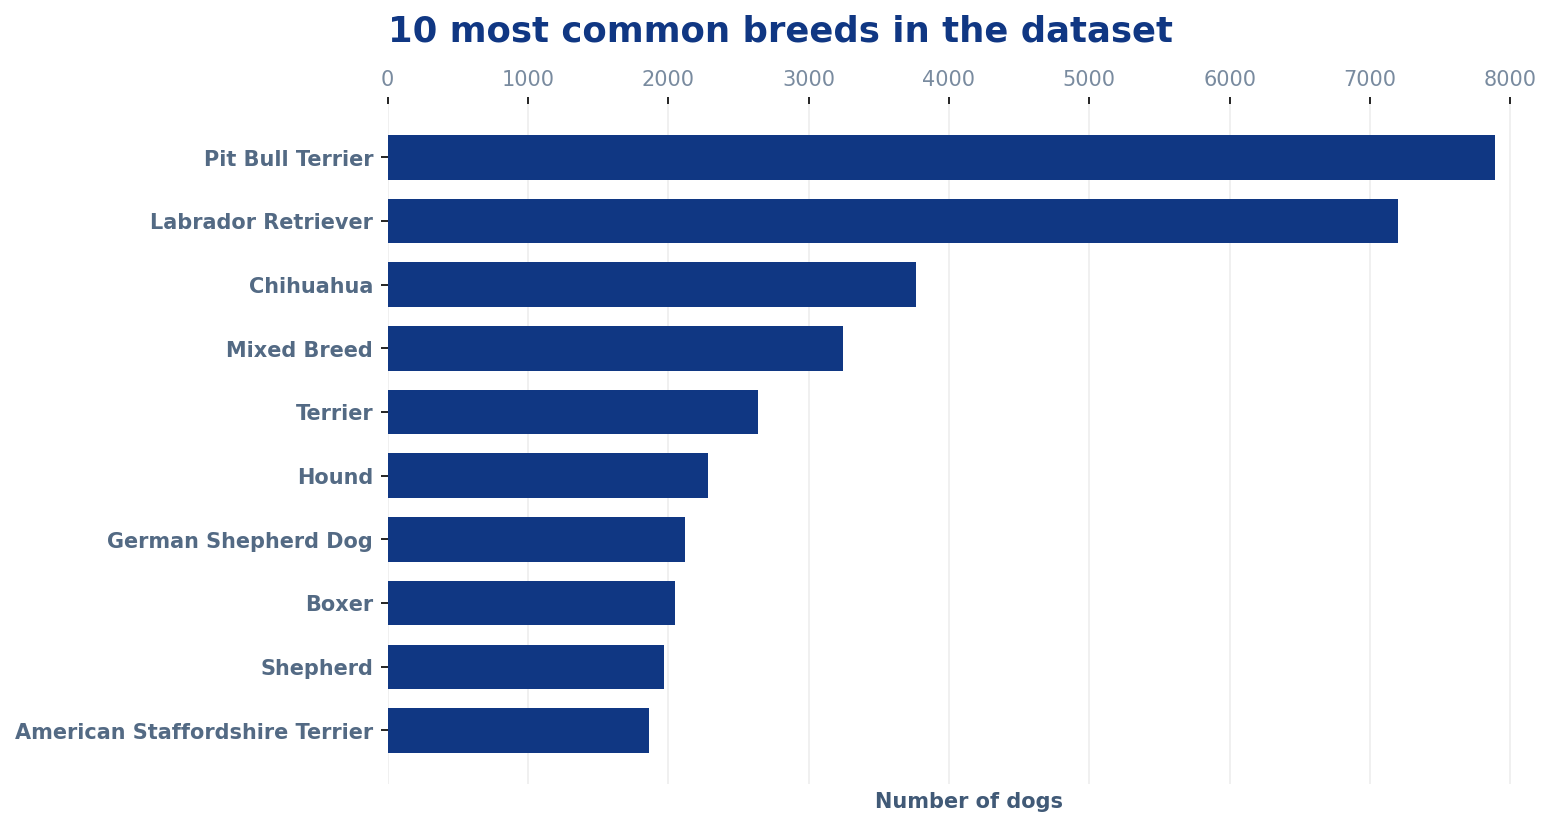

In [23]:
# Plotting the top 10 breeds (use matplotlib) in a horizontal bar chart
plt.figure(figsize=(10, 6), dpi=150)

# background color white
plt.rcParams['axes.facecolor'] = 'white'
# color outside the axes and the figure white
plt.rcParams['figure.facecolor'] = 'white'

# font settings
plt.rcParams['font.family'] = 'Econ Sans Cnd'
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 100

#horizontal bar chart
plt.barh(top10breed['Primary Breed'], top10breed['Total Number'], color='#103783', height=0.7, zorder=3)

plt.gca().invert_yaxis() # to show the most common breed on top

# y labels color
plt.yticks(color='#415a77', fontsize=10, alpha=0.9, fontweight='bold')

# despine
sns.despine(left=True, bottom=True)

# x axis on top
plt.gca().xaxis.set_ticks_position('top')
plt.xlabel('Number of dogs', color='#415a77', fontsize=10, fontweight='bold')
plt.xticks(color='#415a77', fontsize=10, alpha=0.7)

# x grid lines
plt.gca().xaxis.grid(True, linestyle='-', color='lightgrey', alpha=0.4, zorder=0)

# title
plt.title('10 most common breeds in the dataset', loc='left', color='#103783', fontsize=17, fontweight='bold', pad=30)


plt.show()

## 3. For each (primary) breed, determine the ratio between the number of dogs of Mixed Breed and those not of Mixed Breed. Hint: look at the secondary_breed.

One way this could be achieved is, instead of looking at the secondary breed, to just look at the 'mixed_breed' column.<br>
This column has boolean values, so we can just group by the primary breed, sum the values and divide by the total number of dogs of that breed.

In [24]:
mixed_ratio = dogs.groupby('breed_primary')['breed_mixed'].agg(lambda x: ((x==True).sum() / len(x))).reset_index()
mixed_ratio.columns = ['Primary Breed', 'Mixed Breed Ratio']

# displaying the ratio as a percentage with 2 decimals
mixed_ratio['Mixed Breed Ratio'] = mixed_ratio['Mixed Breed Ratio'].apply(lambda x: f'{x:.2%}')

In [25]:
mixed_ratio.head(10)

,Primary Breed,Mixed Breed Ratio
0,Affenpinscher,29.41%
1,Afghan Hound,100.00%
2,Airedale Terrier,89.47%
3,Akbash,66.67%
4,Akita,45.86%
5,Alaskan Malamute,27.78%
6,American Bulldog,77.69%
7,American Eskimo Dog,44.19%
8,American Foxhound,70.59%
9,American Hairless Terrier,50.00%


## 4. For each (primary) breed, determine the earliest and the latest posted timestamp.

Let's first have a look at the timestamp column.

In [26]:
dogs.posted

0        2019-09-20T16:37:59+0000
1        2019-09-20T16:24:57+0000
2        2019-09-20T14:10:11+0000
3        2019-09-20T10:08:22+0000
4        2019-09-20T06:48:30+0000
                   ...           
58175    2019-05-03T14:23:49+0000
58176    2019-04-13T16:20:24+0000
58177    2018-09-27T04:18:56+0000
58178    2018-09-12T05:03:38+0000
58179    2018-09-03T20:42:24+0000
Name: posted, Length: 58180, dtype: object

the posted timestamp is not in a standard format so first we need to convert it using the datetime library

In [27]:
#dogs['posted'] = pd.to_datetime(dogs['posted']).dt.date

looking at the adopted 'posted' column we can see that it gets changed to the actual city name. <br> This means that we need to consider only the adoptable dogs.

In [28]:
adoptable = dogs[dogs.status == 'adoptable']

In [29]:
adoptable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58147 entries, 0 to 58179
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               58147 non-null  int64  
 1   org_id           58147 non-null  object 
 2   url              58147 non-null  object 
 3   type.x           58147 non-null  object 
 4   species          58147 non-null  object 
 5   breed_primary    58147 non-null  object 
 6   breed_secondary  20805 non-null  object 
 7   breed_mixed      58147 non-null  bool   
 8   breed_unknown    58147 non-null  bool   
 9   color_primary    26107 non-null  object 
 10  color_secondary  12044 non-null  object 
 11  color_tertiary   1216 non-null   object 
 12  age              58147 non-null  object 
 13  sex              58147 non-null  object 
 14  size             58147 non-null  object 
 15  coat             27157 non-null  object 
 16  fixed            58147 non-null  bool   
 17  house_traine

let's fix the timestamp now

In [30]:
adoptable['posted'] = pd.to_datetime(adoptable['posted']).dt.date

/var/folders/d0/_t6rl7116p7g18j4_88fd4br0000gp/T/ipykernel_49648/2667638907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adoptable['posted'] = pd.to_datetime(adoptable['posted']).dt.date


In [31]:
adoptable.posted.head()

0    2019-09-20
1    2019-09-20
2    2019-09-20
3    2019-09-20
4    2019-09-20
Name: posted, dtype: object

Now let's extract the earliest and latest timestamp for each breed

In [32]:
earliest_latest_posted = adoptable.groupby('breed_primary')['posted'].agg(['min', 'max']).reset_index()

In [33]:
earliest_latest_posted

,breed_primary,min,max
0,Affenpinscher,2012-03-08,2019-09-14
1,Afghan Hound,2017-06-29,2019-07-27
2,Airedale Terrier,2014-06-13,2019-09-19
3,Akbash,2019-07-21,2019-08-23
4,Akita,2012-03-03,2019-09-20
...,...,...,...
211,Wirehaired Pointing Griffon,2016-06-29,2016-06-29
212,Wirehaired Terrier,2012-11-27,2019-09-19
213,Xoloitzcuintli / Mexican Hairless,2007-02-01,2019-09-08
214,Yellow Labrador Retriever,2010-05-31,2019-09-20


## 5. For each state, compute the sex imbalance, that is the difference between male and female dogs. In which state this imbalance is largest?

Let's have a quick look at the columns involved.

In [34]:
dogs[['id', 'contact_state', 'sex']]

,id,contact_state,sex
0,46042150,NV,Male
1,46042002,NV,Male
2,46040898,NV,Male
3,46039877,NV,Female
4,46039306,NV,Male
...,...,...,...
58175,44605893,WY,Male
58176,44457061,WY,Female
58177,42865848,WY,Female
58178,42734734,WY,Male


In [35]:
dogs.contact_state.unique()

array(['NV', 'AZ', '89146', 'UT', 'CA', 'AK', 'AL', 'AR', '85249', 'CO',
       'NY', 'MA', 'CT', 'RI', 'NJ', 'NH', 'VT', '12220', '12477', 'MD',
       'VA', 'DC', 'PA', 'WV', 'DE', '20136', '20905', '17325', '19063',
       '19053', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', '61944', 'OH',
       '46158', '45061', 'KS', 'KY', '47131', '45249', '47454', 'LA',
       '70601', 'ME', 'QC', 'NB', 'MI', 'MN', 'WI', 'MO', 'MS', 'MT',
       'NC', 'SC', 'ND', 'NE', 'NM', '87108', 'OK', 'OR', 'SD', 'TN',
       '38506', '37189', 'TX', '24588', '23112', 'WA', '98106', 'WY'],
      dtype=object)

let's print all the values that are not 2 letters long.

In [36]:
for state in dogs.contact_state.unique():
    if len(state) != 2:
        print(state)

89146
85249
12220
12477
20136
20905
17325
19063
19053
61944
46158
45061
47131
45249
47454
70601
87108
38506
37189
24588
23112
98106


There seems to be some state that are not in the 'XX' format.<br>
After a brief search they seem to be zip codes.
We could : 
1. not consider these rows (by subsetting the dataframe)
2. try to find a correspondence between the two formats and convert them
3. ignore the difference in format and just group by the state column

### Changing the format

In [37]:
# dictionary with the correct state codes
states_dict = {89146: 'NV', 85249: 'AZ', 12220: 'NY', 12477: 'NY', 20136: 'VA', 20905: 'MD', 17325: 'PA', 19063: 'PA', 
                19053: 'PA', 61944: 'IL', 46158: 'IN', 45061: 'OH', 47131: 'IN', 45249: 'OH', 47454: 'IN', 70601: 'LA',
                87108: 'NM', 38506: 'TN', 37189: 'TN', 24588: 'VA', 23112: 'VA', 98106: 'WA'}

In [38]:
dogs_test = dogs.copy()

In [39]:
dogs_test['contact_state'] = dogs_test['contact_state'].replace(states_dict)

In [40]:
dogs_test.contact_state.unique()

array(['NV', 'AZ', '89146', 'UT', 'CA', 'AK', 'AL', 'AR', '85249', 'CO',
       'NY', 'MA', 'CT', 'RI', 'NJ', 'NH', 'VT', '12220', '12477', 'MD',
       'VA', 'DC', 'PA', 'WV', 'DE', '20136', '20905', '17325', '19063',
       '19053', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', '61944', 'OH',
       '46158', '45061', 'KS', 'KY', '47131', '45249', '47454', 'LA',
       '70601', 'ME', 'QC', 'NB', 'MI', 'MN', 'WI', 'MO', 'MS', 'MT',
       'NC', 'SC', 'ND', 'NE', 'NM', '87108', 'OK', 'OR', 'SD', 'TN',
       '38506', '37189', 'TX', '24588', '23112', 'WA', '98106', 'WY'],
      dtype=object)

I have no idea why it doesn't change the values. For now i'll just ignore the difference in format and group by the state column.

### Back to the question

In [41]:
dogs.sex.unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

We may want to consider only the dogs with a known sex.

In [42]:
sex_imbalance = dogs[dogs.sex != 'Unknown'].groupby('contact_state')['sex'].agg([
    ('males', lambda x: (x == 'Male').sum()),
    ('females', lambda x: (x == 'Female').sum())])\
    .reset_index()

# adding the difference as a new column
sex_imbalance['sex_imbalance'] = sex_imbalance.males-sex_imbalance.females

In [43]:
sex_imbalance

,contact_state,males,females,sex_imbalance
0,12220,2,1,1
1,12477,1,1,0
2,17325,1,1,0
3,19053,0,1,-1
4,19063,0,1,-1
...,...,...,...,...
70,VT,276,234,42
71,WA,682,595,87
72,WI,277,265,12
73,WV,333,232,101


positive values means a state has more males than females

to compute the largest sex imbalance in a state we could consider the absolute largest difference or the highest and lowest difference.<br>
I'll go with the latter.

In [44]:
sex_imbalance\
    .loc[[sex_imbalance['sex_imbalance'].idxmax(), sex_imbalance['sex_imbalance']\
    .idxmin()]]


,contact_state,males,females,sex_imbalance
58,OH,1439,1231,208
27,CO,861,912,-51


## 6. For each pair (age, size), determine the average duration of the stay and the average cost of stay.

This request is pretty straightforward.<br><br>
We can just group by the age and size columns and compute the mean of the 'duration' and 'cost' columns.

In [45]:
avg_stay_cost = dogs.groupby(['age', 'size'])[['stay_duration','stay_cost']] \
    .mean() \
    .reset_index() \
    .rename(columns = {'stay_duration':'avg_stay_duration', 'stay_cost':'avg_stay_cost'}) \
    .round(2)

In [46]:
avg_stay_cost

,age,size,avg_stay_duration,avg_stay_cost
0,Adult,Extra Large,89.02,232.59
1,Adult,Large,89.53,238.66
2,Adult,Medium,89.42,238.26
3,Adult,Small,89.41,238.97
4,Baby,Extra Large,87.03,237.18
5,Baby,Large,89.70,238.70
6,Baby,Medium,89.58,237.11
7,Baby,Small,89.96,239.08
8,Senior,Extra Large,88.86,235.23
9,Senior,Large,88.98,237.51


the values are pretty close to each other so a bar chart wouldn't be very useful.<br>
we could try to use a scatter plot.

findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.


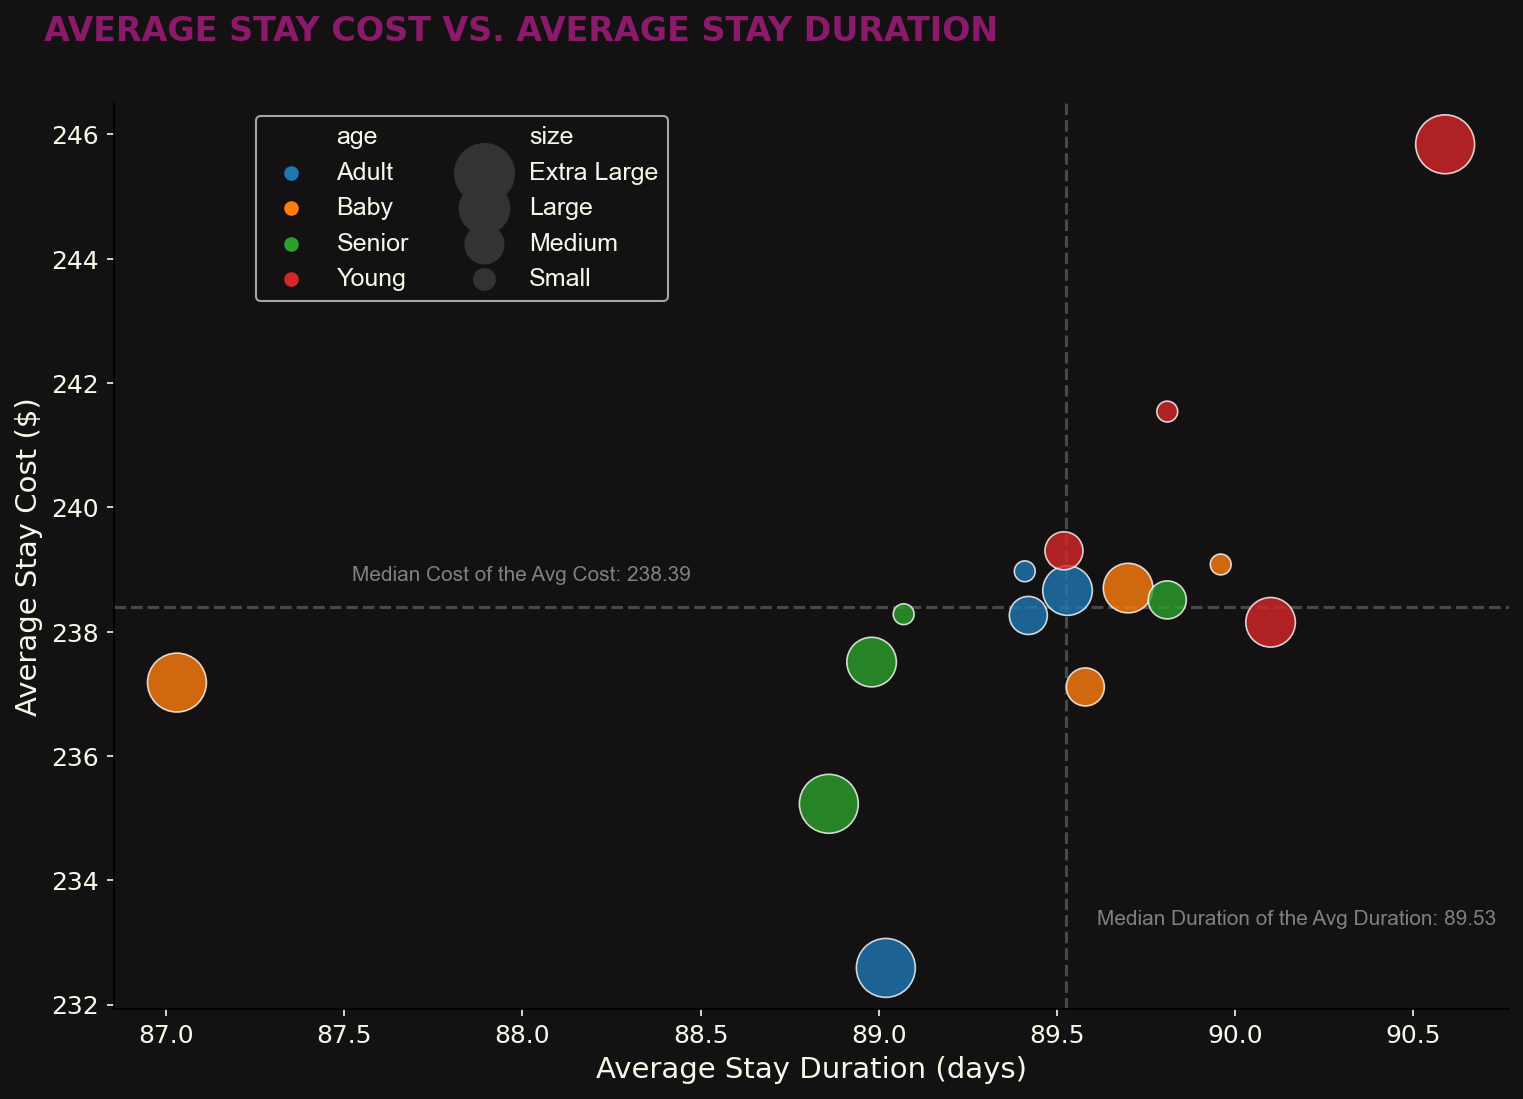

In [47]:
# Plot size
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# Set the font of the plot
plt.rcParams['font.family'] = 'arial'

# Set the plot and background color 
fig.patch.set_facecolor('#131112')
ax.set_facecolor('#131112')

# no grid lines
ax.grid(False)

# scatter plot
sns.scatterplot(data=avg_stay_cost, x='avg_stay_duration', y='avg_stay_cost', alpha=0.8, hue='age', size='size', sizes=(100, 800))

# legend definition
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.25, 1), ncol=2)
legend.get_frame().set_facecolor('#131112')
for text in legend.get_texts():
    text.set_color('#F4F9E9')

# median lines definition
ax.axvline(avg_stay_cost.avg_stay_duration.median(), ls='--', color='grey', alpha=0.5, zorder=0)
ax.axhline(avg_stay_cost.avg_stay_cost.median(), ls='--', color='grey', alpha=0.5, zorder=0)

# Annotate the lines with labels
ax.annotate(
    f'Median Duration of the Avg Duration: {avg_stay_cost.avg_stay_duration.median():.2f}',
    xy=(avg_stay_cost.avg_stay_duration.median(), avg_stay_cost.avg_stay_cost.median()),
    xytext=(15, -150),  # Offset for label position 
    textcoords='offset points',
    color='grey',
    fontsize=10,
    va='center',
    ha='left', 
)

ax.annotate(
    f'Median Cost of the Avg Cost: {avg_stay_cost.avg_stay_cost.median():.2f}',
    xy=(avg_stay_cost.avg_stay_duration.median(), avg_stay_cost.avg_stay_cost.median()),
    xytext=(-180, 20),  # Offset for label position
    textcoords='offset points',
    color='grey',
    fontsize=10,
    va='top',
    ha='right', 
)

# Change the tick label colors
ax.tick_params(axis='both', colors='#F4F9E9')

# despine plot
sns.despine(ax=ax, top=True, right=True)

# set x and y axis labels
ax.set_xlabel('Average Stay Duration (days)', fontsize=14, color='#F4F9E9')
ax.set_ylabel('Average Stay Cost ($)', fontsize=14, color='#F4F9E9')

# set title
title = ax.set_title('AVERAGE STAY COST VS. AVERAGE STAY DURATION', fontsize=16, color='#8C1A6A', loc="left", pad=30, fontweight='bold')
title.set_position([-0.05, 1.05])

plt.show()

#### _Alternatively a more descriptive way would be to use .describe()_

In [48]:
dogs.groupby(['age', 'size'])[['stay_duration','stay_cost']].describe()

stay_duration                                           \
                           count       mean        std   min    25%   50%   
age    size                                                                 
Adult  Extra Large         519.0  89.015414  20.219447  34.0  74.50  88.0   
       Large              9204.0  89.531943  20.043616  11.0  76.00  90.0   
       Medium            13044.0  89.421036  20.090098  11.0  76.00  89.0   
       Small              5188.0  89.407479  19.957341  19.0  76.00  89.0   
Baby   Extra Large          91.0  87.032967  19.723337  28.0  74.50  87.0   
       Large              1662.0  89.701564  20.693427  24.0  75.25  90.0   
       Medium             5678.0  89.577668  20.295506  14.0  76.00  90.0   
       Small              1966.0  89.958291  19.917215  26.0  76.00  90.0   
Senior Extra Large          72.0  88.861111  21.695268  15.0  75.00  90.5   
       Large              1210.0  88.984298  19.937800  22.0  75.00  89.0   
       Medium             1532.0  89.810052  19.711037  23.0  76.00  89.0   
       Small              1820.0  89.073626  19.656676  25.0  76.00  89.0   
Young  Extra Large         249.0  90.586345  19.510584  42.0  78.00  90.0   
       Large              3685.0  90.104206  19.864497  27.0  76.00  90.0   
       Medium             9654.0  89.515123  20.038441   2.0  76.00  89.0   
       Small              2606.0  89.814275  19.976532  27.0  76.00  90.0   

                                 stay_cost                                  \
                      75%    max     count        mean         std     min   
age    size                                                                  
Adult  Extra Large  102.0  147.0     519.0  232.591561  103.640467  -39.51   
       Large        103.0  166.0    9204.0  238.661141  104.814772 -110.12   
       Medium       103.0  163.0   13044.0  238.258977  104.441833 -140.12   
       Small        103.0  165.0    5188.0  238.974838  105.077681 -103.97   
Baby   Extra Large  102.0  132.0      91.0  237.180879   90.468167   14.88   
       Large        103.0  150.0    1662.0  238.698827  101.904485  -41.62   
       Medium       103.0  174.0    5678.0  237.108131  103.032979  -93.63   
       Small        103.0  161.0    1966.0  239.083810  101.046096  -82.99   
Senior Extra Large  103.5  145.0      72.0  235.232361   92.745090   -2.60   
       Large        102.0  151.0    1210.0  237.507364  103.667596  -91.98   
       Medium       104.0  151.0    1532.0  238.514615  102.230557  -49.69   
       Small        103.0  153.0    1820.0  238.282286  106.871455  -78.24   
Young  Extra Large  104.0  139.0     249.0  245.835582  101.822825    4.52   
       Large        103.0  168.0    3685.0  238.149506  103.790095  -96.78   
       Medium       103.0  166.0    9654.0  239.304603  105.215503 -150.60   
       Small        103.0  156.0    2606.0  241.540069  105.238405  -79.00   

                                                         
                         25%      50%       75%     max  
age    size                                              
Adult  Extra Large  158.2700  223.340  293.0950  571.81  
       Large        163.9400  228.900  303.5300  760.40  
       Medium       165.8425  228.680  302.3550  751.74  
       Small        165.3075  230.430  302.1200  722.36  
Baby   Extra Large  184.5800  236.050  288.8650  457.49  
       Large        167.6075  229.635  302.6325  659.39  
       Medium       165.0275  230.105  301.6850  666.01  
       Small        167.9075  231.395  301.4325  682.11  
Senior Extra Large  194.2700  228.270  275.3875  504.25  
       Large        163.5925  229.245  301.5250  662.41  
       Medium       168.4300  231.575  301.4325  636.69  
       Small        162.8800  231.675  301.3125  700.59  
Young  Extra Large  167.7100  246.570  313.1300  590.40  
       Large        165.6900  230.340  300.3200  692.90  
       Medium       165.3175  230.685  303.5150  968.83  
       Small        165.7650

## 7. Find the dogs involved in at least 3 travels. Also list the breed of those dogs.

after taking a look at travels we need to: 
1. join the travels table with the dogs table on the id to get the breed. 
2. then we can group by the id and count the number of travels for each dog.
3. finally we can filter the dogs with at least 3 travels.

In [49]:
dogs_travels = pd.merge(dogs, travels, how='left', on='id')

In [50]:
dog_travels_numbers = dogs_travels.groupby(['id', 'breed_primary'])['id'].count().reset_index(name='Travels')

In [51]:
dog_travels_numbers

,id,breed_primary,Travels
0,604115,Beagle,1
1,2592031,Beagle,1
2,2613506,Dalmatian,1
3,4527948,Boxer,1
4,5142790,Greyhound,1
...,...,...,...
58175,46042881,Cocker Spaniel,1
58176,46042882,German Shepherd Dog,1
58177,46042883,Chihuahua,1
58178,46043099,Labrador Retriever,3


Now we can view the dogs with at least 3 travels and their breed

In [52]:
dog_travels_numbers[dog_travels_numbers['Travels']>=3]

,id,breed_primary,Travels
163,16657005,Pit Bull Terrier,4
288,20905974,Chow Chow,5
507,24894870,Hound,4
508,24894894,Hound,4
1532,33218331,Alaskan Malamute,7
...,...,...,...
58151,46042569,Labrador Retriever,3
58152,46042587,Labrador Retriever,3
58154,46042618,Labrador Retriever,3
58178,46043099,Labrador Retriever,3


## 8. Fix the travels table so that the correct state is computed from the manual and the found fields. If manual is not missing, then it overrides what is stored in found.

I'll do the fixing in a new dataframe so that the original one is not modified.

In [53]:
travels_fixed = travels.copy()

In [54]:
travels_fixed['correct_state'] = np.where(travels_fixed['manual'].isnull(), travels_fixed['found'], travels_fixed['manual'])

In [55]:
travels_fixed

,id,contact_city,contact_state,description,found,manual,remove,still_there,correct_state
0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN,Arkansas
1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN,Bahamas
2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN,Maryland
3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN,Adaptil
4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN,Afghanistan
...,...,...,...,...,...,...,...,...,...
6189,40492179,Fairmont,WV,Please contact Pet (information@pethelpersinc....,WV,NaN,True,NaN,WV
6190,45799729,Eagle Mountain,UT,Shiny is an approximately 4-6-year-old spayed ...,Wyoming,NaN,NaN,NaN,Wyoming
6191,34276515,Newnan,GA,Yanni is a Male Great Pyrenees that we rescue...,Yazmin,NaN,True,NaN,Yazmin
6192,44519341,Dayton,OH,Callie is a 14 year old Chihuahua whose owner ...,Young,Ohio,NaN,NaN,Ohio


## 9. For each state, compute the ratio between the number of travels and the population.

### Human population / dogs travelled

the ratio can be computed only for the states that match both tables. <br> We can use a left join to keep the american states with their population and the travels that match them. <br> Then we can compute the ratio.

In [56]:
match_state_travels = pd.merge(nst, travels_fixed, how='left', left_on='State', right_on='correct_state')

In [57]:
match_state_travels

,State,Population,id,contact_city,contact_state,description,found,manual,remove,still_there,correct_state
0,Alabama,5.024.279,45987719.0,Locust Fork,AL,Meet Trixie... she is a female 2yr. Old Chihua...,Alabama,NaN,NaN,NaN,Alabama
1,Alabama,5.024.279,45943086.0,Locust Fork,AL,"Meet Reba, a 2-year-old Dachshund with a sleek...",Alabama,NaN,NaN,NaN,Alabama
2,Alabama,5.024.279,45942459.0,Locust Fork,AL,What a sweet boy Moric is! A 1-year-old mix of...,Alabama,NaN,NaN,NaN,Alabama
3,Alabama,5.024.279,45942229.0,Locust Fork,AL,Bert is a 2-year old Chihuahua mix who weighs ...,Alabama,NaN,NaN,NaN,Alabama
4,Alabama,5.024.279,45941983.0,Locust Fork,AL,"Gypsy Girl is a 4-year-old, 15-pound Chihuahua...",Alabama,NaN,NaN,NaN,Alabama
...,...,...,...,...,...,...,...,...,...,...,...
4184,Wisconsin,5.893.718,45560305.0,Troy,IL,"Hi, my name is Willow.I am a 2 year old mini A...",Wisconsin,NaN,NaN,NaN,Wisconsin
4185,Wisconsin,5.893.718,45101607.0,Tonka Bay,MN,"\""Hi, I'm Teddy!\n\nTeddy is a mature (almost ...",Wisconsin,NaN,NaN,NaN,Wisconsin
4186,Wisconsin,5.893.718,43601110.0,Rockaway,NJ,Alphie Jo was my best friend's dog (my aunt). ...,Wisconsin,NaN,True,NaN,Wisconsin
4187,Wisconsin,5.893.718,43830083.0,Rhinelander,WI,Agata came to OCHS as a transfer from another ...,Wisconsin,NaN,NaN,NaN,Wisconsin


In [58]:
match_state_travels.columns

Index(['State', 'Population', 'id', 'contact_city', 'contact_state',
       'description', 'found', 'manual', 'remove', 'still_there',
       'correct_state'],
      dtype='object')

I'll drop the columns that are not needed anymore.

In [59]:
match_state_travels = match_state_travels[['State', 'Population', 'id', 'contact_city', 'contact_state']]

In [60]:
match_state_travels

,State,Population,id,contact_city,contact_state
0,Alabama,5.024.279,45987719.0,Locust Fork,AL
1,Alabama,5.024.279,45943086.0,Locust Fork,AL
2,Alabama,5.024.279,45942459.0,Locust Fork,AL
3,Alabama,5.024.279,45942229.0,Locust Fork,AL
4,Alabama,5.024.279,45941983.0,Locust Fork,AL
...,...,...,...,...,...
4184,Wisconsin,5.893.718,45560305.0,Troy,IL
4185,Wisconsin,5.893.718,45101607.0,Tonka Bay,MN
4186,Wisconsin,5.893.718,43601110.0,Rockaway,NJ
4187,Wisconsin,5.893.718,43830083.0,Rhinelander,WI


Given that we already have the number of travels per dog from an earlier request we can merge the dataset to compute the ratio.

In [61]:
StatePop_Dogs_Travels = pd.merge(match_state_travels, dog_travels_numbers, how='left', on='id')

In [62]:
StatePop_Dogs_Travels

,State,Population,id,contact_city,contact_state,breed_primary,Travels
0,Alabama,5.024.279,45987719.0,Locust Fork,AL,Chihuahua,1.0
1,Alabama,5.024.279,45943086.0,Locust Fork,AL,Dachshund,1.0
2,Alabama,5.024.279,45942459.0,Locust Fork,AL,Labrador Retriever,1.0
3,Alabama,5.024.279,45942229.0,Locust Fork,AL,Chihuahua,1.0
4,Alabama,5.024.279,45941983.0,Locust Fork,AL,Chihuahua,1.0
...,...,...,...,...,...,...,...
4184,Wisconsin,5.893.718,45560305.0,Troy,IL,Australian Shepherd,1.0
4185,Wisconsin,5.893.718,45101607.0,Tonka Bay,MN,Shih Tzu,1.0
4186,Wisconsin,5.893.718,43601110.0,Rockaway,NJ,English Coonhound,1.0
4187,Wisconsin,5.893.718,43830083.0,Rhinelander,WI,Mixed Breed,1.0


the dots in the population column may cause problems so let's remove them and convert the column to float

In [63]:
StatePop_Dogs_Travels.Population

0       5.024.279
1       5.024.279
2       5.024.279
3       5.024.279
4       5.024.279
          ...    
4184    5.893.718
4185    5.893.718
4186    5.893.718
4187    5.893.718
4188      576.851
Name: Population, Length: 4189, dtype: object

In [64]:
StatePop_Dogs_Travels['Population'] = StatePop_Dogs_Travels['Population'].str.replace('.', '').astype(float)

/var/folders/d0/_t6rl7116p7g18j4_88fd4br0000gp/T/ipykernel_49648/645202575.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  StatePop_Dogs_Travels['Population'] = StatePop_Dogs_Travels['Population'].str.replace('.', '').astype(float)


In [65]:
StatePop_Dogs_Travels.Population

0       5024279.0
1       5024279.0
2       5024279.0
3       5024279.0
4       5024279.0
          ...    
4184    5893718.0
4185    5893718.0
4186    5893718.0
4187    5893718.0
4188     576851.0
Name: Population, Length: 4189, dtype: float64

Let's create the grouped dataframe

In [66]:
RatioTravels = StatePop_Dogs_Travels.groupby(['State', 'Population'])['Travels'].sum().reset_index()

# now the ratio
RatioTravels['Ratio'] = RatioTravels['Travels']/RatioTravels['Population']

In [67]:
RatioTravels

,State,Population,Travels,Ratio
0,Alabama,5024279.0,364.0,7.244821e-05
1,Alaska,733391.0,0.0,0.000000e+00
2,Arizona,7151502.0,36.0,5.033908e-06
3,Arkansas,3011524.0,75.0,2.490433e-05
4,California,39538223.0,747.0,1.889311e-05
5,Colorado,5773714.0,21.0,3.637174e-06
6,Connecticut,3605944.0,17.0,4.714438e-06
7,Delaware,989948.0,33.0,3.333508e-05
8,District of Columbia,689545.0,0.0,0.000000e+00
9,Florida,21538187.0,286.0,1.327874e-05


the numbers are really small so we could consider the population for every 1 million people.

In [68]:
RatioTravels['Ratio1million'] = (RatioTravels['Ratio']*1000000).round(2)

In [69]:
RatioTravels

,State,Population,Travels,Ratio,Ratio1million
0,Alabama,5024279.0,364.0,7.244821e-05,72.45
1,Alaska,733391.0,0.0,0.000000e+00,0.00
2,Arizona,7151502.0,36.0,5.033908e-06,5.03
3,Arkansas,3011524.0,75.0,2.490433e-05,24.90
4,California,39538223.0,747.0,1.889311e-05,18.89
5,Colorado,5773714.0,21.0,3.637174e-06,3.64
6,Connecticut,3605944.0,17.0,4.714438e-06,4.71
7,Delaware,989948.0,33.0,3.333508e-05,33.34
8,District of Columbia,689545.0,0.0,0.000000e+00,0.00
9,Florida,21538187.0,286.0,1.327874e-05,13.28


For example in West Verginia there dogs have travelled 137 times for every 1 million people.

This ratio may not really make sense with the human population so we could consider the number of dogs instead.

### Dogs population / dogs travelled

In [70]:
dogs_population = dogs.groupby('contact_state')['id'].count().reset_index(name='Dogs Population')

In [71]:
dogs_population

,contact_state,Dogs Population
0,12220,3
1,12477,2
2,17325,2
3,19053,1
4,19063,1
...,...,...
70,VT,510
71,WA,1277
72,WI,542
73,WV,565


let's see how many dogs have travelled in each state.

In [72]:
travels

,id,contact_city,contact_state,description,found,manual,remove,still_there
0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6189,40492179,Fairmont,WV,Please contact Pet (information@pethelpersinc....,WV,NaN,True,NaN
6190,45799729,Eagle Mountain,UT,Shiny is an approximately 4-6-year-old spayed ...,Wyoming,NaN,NaN,NaN
6191,34276515,Newnan,GA,Yanni is a Male Great Pyrenees that we rescue...,Yazmin,NaN,True,NaN
6192,44519341,Dayton,OH,Callie is a 14 year old Chihuahua whose owner ...,Young,Ohio,NaN,NaN


In [73]:
dogs_state_travels = travels.groupby('contact_state')['id'].count().reset_index(name='Travels Population')

Let's merge the two datasets

In [74]:
RatioTravels2 = pd.merge(dogs_population, dogs_state_travels, how='left', on='contact_state')

In [75]:
RatioTravels2

,contact_state,Dogs Population,Travels Population
0,12220,3,NaN
1,12477,2,NaN
2,17325,2,10.0
3,19053,1,NaN
4,19063,1,NaN
...,...,...,...
70,VT,510,49.0
71,WA,1277,634.0
72,WI,542,83.0
73,WV,565,27.0


let's make sure that each column has the correct numerical type

In [76]:
RatioTravels2['Dogs Population'] = RatioTravels2['Dogs Population'].astype(float)
RatioTravels2['Travels Population'] = RatioTravels2['Travels Population'].astype(float)

Now for the ratio

In [77]:
RatioTravels2['Ratio'] = (RatioTravels2['Travels Population']/RatioTravels2['Dogs Population']*100).round(2).astype(str) + '%'

In [78]:
RatioTravels2

,contact_state,Dogs Population,Travels Population,Ratio
0,12220,3.0,NaN,nan%
1,12477,2.0,NaN,nan%
2,17325,2.0,10.0,500.0%
3,19053,1.0,NaN,nan%
4,19063,1.0,NaN,nan%
...,...,...,...,...
70,VT,510.0,49.0,9.61%
71,WA,1277.0,634.0,49.65%
72,WI,542.0,83.0,15.31%
73,WV,565.0,27.0,4.78%


## 10. For each dog, compute the number of days from the posted day to the day of last access.

First let's consider only the dogs with the 'adoptable' status so that we're sure to get the timestamp from the 'posted' column.<br>
We already have that subset, its the 'adoptable' dataframe.

I initially tought that the last access could be found in the accessed column but looking at the data it's not that clear.

In [79]:
adoptable.accessed.describe()

count          58147
unique             1
top       2019-09-20
freq           58147
Name: accessed, dtype: object

apart from a couple missing rows the accessed column has the same value for all the dogs.

at this point I'll just assume the last access is the maximum posted timestamp for each dog.<br>
So let's consider the old dataset and add the difference in days between the first and the last access for every dog.

In [80]:
days_difference = adoptable.groupby('id')['posted'].agg(['min', 'max']).reset_index()

In [81]:
days_difference['days'] = days_difference['max'] - days_difference['min']

In [82]:
days_difference

,id,min,max,days
0,604115,2003-05-18,2003-05-18,0 days
1,2592031,2004-02-23,2004-02-23,0 days
2,2613506,2004-02-29,2004-02-29,0 days
3,4527948,2005-05-30,2005-05-30,0 days
4,5142790,2005-09-26,2005-09-26,0 days
...,...,...,...,...
58142,46042881,2019-09-20,2019-09-20,0 days
58143,46042882,2019-09-20,2019-09-20,0 days
58144,46042883,2019-09-20,2019-09-20,0 days
58145,46043099,2019-09-20,2019-09-20,0 days


but it doesn't make sense.

## 11. Partition the dogs according to the number of weeks from the posted day to the day of last access.

## 12. Find for duplicates in the dogs dataset. Two records are duplicates if they have (1) same breeds and sex, and (2) they share at least 90% of the words in the description field. Extra points if you find and implement a more refined for determining if two rows are duplicates.

Based on the conditions, one method could be to use the .duplicated() method on the dataframe with the columns we need to check.

In [83]:
duplicates = dogs.duplicated(subset=['breed_primary', 'breed_secondary', 'sex', 'description'], keep=False)

In [84]:
dogs_duplicates = dogs[duplicates]

In [85]:
dogs_duplicates

,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,...,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description,stay_duration,stay_cost
3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,NaN,...,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN,62,145.83
14,46038070,NV26,https://www.petfinder.com/dog/henna-46038070/n...,Dog,Dog,Pit Bull Terrier,NaN,True,False,NaN,...,Las Vegas,NV,89101,US,89009,2019-09-20,Dog,NaN,117,544.07
15,46038064,NV26,https://www.petfinder.com/dog/rubo-46038064/nv...,Dog,Dog,German Shepherd Dog,NaN,True,False,NaN,...,Las Vegas,NV,89101,US,89009,2019-09-20,Dog,NaN,114,300.71
16,46038065,NV26,https://www.petfinder.com/dog/lego-46038065/nv...,Dog,Dog,Schnauzer,Mixed Breed,True,False,NaN,...,Las Vegas,NV,89101,US,89009,2019-09-20,Dog,NaN,82,285.86
17,46038067,NV26,https://www.petfinder.com/dog/marie-46038067/n...,Dog,Dog,Pit Bull Terrier,NaN,True,False,NaN,...,Las Vegas,NV,89101,US,89009,2019-09-20,Dog,NaN,136,231.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58174,44629272,WY04,https://www.petfinder.com/dog/cheyenne-4462927...,Dog,Dog,Shepherd,Australian Cattle Dog / Blue Heeler,True,False,Brown / Chocolate,...,Worland,WY,82401,US,WY,2019-09-20,Dog,NaN,97,242.85
58175,44605893,WY20,https://www.petfinder.com/dog/tren-44605893/wy...,Dog,Dog,Border Collie,NaN,False,False,"Tricolor (Brown, Black, & White)",...,Lander,WY,82520,US,WY,2019-09-20,Dog,"Due to the small size of our volunteer base, w...",100,324.34
58176,44457061,WY24,https://www.petfinder.com/dog/harley-44457061/...,Dog,Dog,Australian Shepherd,Australian Cattle Dog / Blue Heeler,True,False,NaN,...,Riverton,WY,82501,US,WY,2019-09-20,Dog,NaN,65,245.90
58178,42734734,WY24,https://www.petfinder.com/dog/simon-42734734/w...,Dog,Dog,Boxer,Mixed Breed,True,False,NaN,...,Riverton,WY,82501,US,WY,2019-09-20,Dog,NaN,58,61.05


then based on this we can drop them from the dataframe based on the index.

We have 10548 duplicates so our final dataframe should have 10548 less rows than the original one.

In [86]:
dogs_no_duplicates = dogs.drop(dogs[duplicates].index)

In [87]:
dogs.id.count()-dogs_no_duplicates.id.count()

10548

The only problem with this method is that it doesn't take into account the 90% threshold for the description field.